## Hyperparameter Optimization

### General Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

### Constructing the classifier

In [2]:
# read the data
star_data = pd.read_csv("D:\ProjectData\pulsar_data.csv")

# check data frame shape
star_data.shape

(9273, 9)

In [3]:
# split into input and target data
X = star_data.drop('target_class', 1)
y = star_data['target_class']

In [4]:
y.value_counts()

0    8423
1     850
Name: target_class, dtype: int64

In [5]:
from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler()

X_ss = pd.DataFrame(s_scaler.fit_transform(X), 
                            columns = X.columns)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size=0.25, random_state=42)

In [7]:
import sklearn 
sklearn.__version__

'0.24.2'

### Implementing the SVM

In [8]:
from sklearn import svm 

clf = svm.SVC(kernel = 'linear', C = 10)

clf.fit(X_train, y_train)

SVC(C=10, kernel='linear')

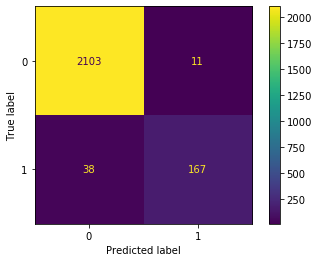

In [9]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test)  

In [10]:
from sklearn.metrics import f1_score, precision_score

y_pred = clf.predict(X_test)

f1_score(y_test, y_pred)

0.8720626631853786

### Hyperparameter Optimization

Here we choose to optimize four hyperparameters for a support vector machine classifier, these are:
- **C:** regularization parameter
- **kernel:** pecifies the kernel type to be used in the algorithm (linear, poly, rbf, sigmoid, precomputed)
- **poly**: degree of the polynomial kernel function (poly)
- **gamma**: kernel coefficient for rbf, poly and sigmoid

#### Defining hyperparameter space

In [11]:
hyperparameters = {"C":[0.001, 0.01, 0.1, 1, 10, 100] , 
                  "kernel" : ["linear", "poly", "rbf", "sigmoid"], 
                  "degree" : [1, 2, 3, 4],
                 "gamma": [0.0001, 0.001, 0.01, 0.1, 1, 10]}

#### Manual Search

In [12]:
# set model hyperparameters
clf_rbf = svm.SVC(kernel = 'rbf', C = 10, gamma = 0.1)

# fit the model to the training data
clf_rbf.fit(X_train, y_train)

#generate a set of predictions
y_pred = clf_rbf.predict(X_test)

# model evaluation
f1_score(y_test, y_pred)

0.883720930232558

#### Random search

In [13]:
from sklearn.model_selection import RandomizedSearchCV

# perform random search
clf_rs = RandomizedSearchCV(svm.SVC(), hyperparameters, cv = 3, scoring = "f1", n_iter = 20)
random_search = clf_rs.fit(X_train, y_train)

# identify best parameters from random search
random_search.best_params_

{'kernel': 'linear', 'gamma': 0.001, 'degree': 4, 'C': 100}

In [14]:
# set model hyperparameters
y_pred_rs = random_search.best_estimator_.predict(X_test)

# model evaluation
f1_score(y_test, y_pred_rs)

0.8697916666666666

#### Grid search

In [ ]:
from sklearn.model_selection import GridSearchCV

# perform grid search
clf_gs = GridSearchCV(svm.SVC(), hyperparameters, cv = 3, scoring = "f1")
grid_search = clf_gs.fit(X_train, y_train)

# identify best parameters from grid search
grid_search.best_params_

In [ ]:
# set model hyperparameters
y_pred_gs = grid_search.best_estimator_.predict(X_test)

# model evaluation
f1_score(y_test, y_pred_gs)

#### Bayesian Optimization

In [ ]:
from skopt import BayesSearchCV

# perform bayesian optimization
clf_bo = BayesSearchCV(svm.SVC(), hyperparameters, cv =3, scoring = "f1", n_iter = 20)
bayes_search = clf_bo.fit(X_train, y_train)

# identify best parameters from bayesian optimization
bayes_search.best_params_

In [ ]:
y_pred_bo = bayes_search.best_estimator_.predict(X_test)

f1_score(y_test, y_pred_bo)